In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
df = pd.read_csv("student_performance_data.csv")
df

,Hours Studied,Attendance Rate (%),Final Exam Score
0,10.747912,99.386119,84.550973
1,18.397112,71.388657,88.017165
2,6.926920,69.216332,55.267153
3,6.939064,83.982364,73.519726
4,14.750025,60.912694,83.344138
...,...,...,...
245,5.744780,53.017604,36.674569
246,5.926162,62.355162,48.399938
247,4.672155,57.977234,38.485544
248,0.841864,93.589178,45.642531


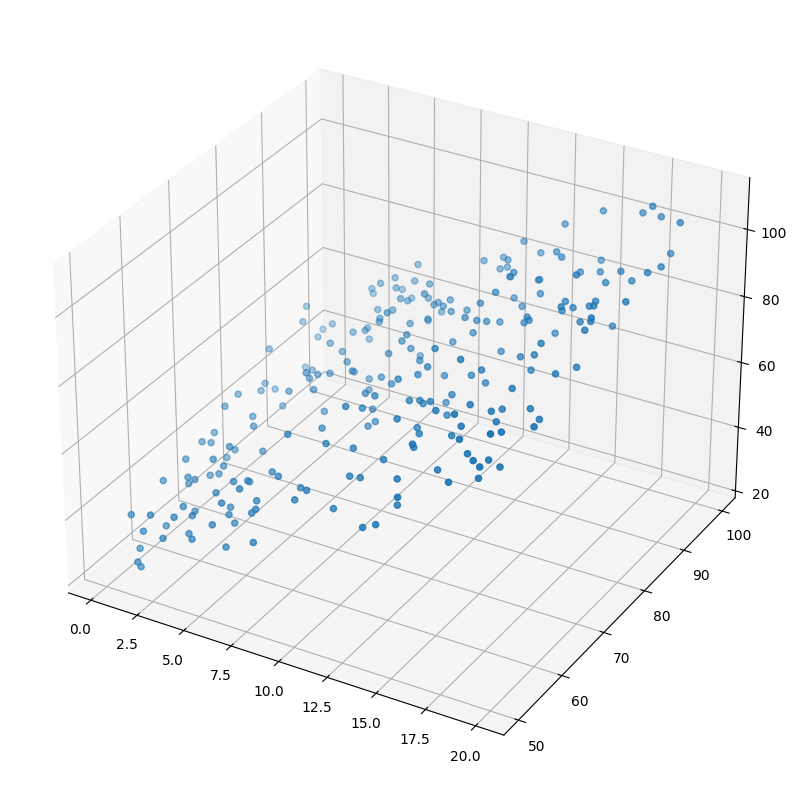

In [48]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (10,20))
ax = fig.add_subplot(111, projection = "3d")
ax.scatter(df["Hours Studied"],df["Attendance Rate (%)"], df["Final Exam Score"])

In [38]:
x = df.iloc[:,:2]
y = df.iloc[:,-1:]
y

,Final Exam Score
0,84.550973
1,88.017165
2,55.267153
3,73.519726
4,83.344138
...,...
245,36.674569
246,48.399938
247,38.485544
248,45.642531


In [39]:
from sklearn.model_selection import train_test_split

In [40]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)

In [41]:
from sklearn.linear_model import LinearRegression

In [42]:
lr = LinearRegression()

In [43]:
lr.fit(x_train,y_train)

LinearRegression()

In [44]:
predict = lr.predict(x_test)

In [45]:
df.head(2)

,Hours Studied,Attendance Rate (%),Final Exam Score
0,10.747912,99.386119,84.550973
1,18.397112,71.388657,88.017165


In [46]:
# y = b1x1 + b2x2 + bo
bo = lr.intercept_
print(bo)
bm = lr.coef_
print(bm)
b1 = bm[0,0]
b2 = bm[0,1]
print(b1)
print(b2)
y = (b1 * 18.397112)+ (b2 *71.388657) + bo
y

[5.09133221]
[[2.90732069 0.44734282]]
2.907320691035731
0.4473428208382587


array([90.51283978])

In [47]:
from sklearn.metrics import r2_score
r2_score(y_test, predict)

0.9384060206712895

In [49]:
import joblib
joblib.dump(lr, "performance_predictor.joblib")

['performance_predictor.joblib']